<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/4_2the_image_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.0-alpha1.post0

In [2]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from matplotlib_inline import backend_inline
import collections
import inspect
from IPython import display


In [3]:
def use_svg_display():
  """Use the svg (Scalable Vector Graphics) format to display a plot in Jupyter."""
  backend_inline.set_matplotlib_formats('svg')

use_svg_display()

## 1. Object-oriented Design for Implementation

In [4]:
import numpy as np
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


### 1.1 Utilities

In [5]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [6]:
class A:
  def __init__(self):
    self.b = 1

a = A()

In [7]:
@add_to_class(A)
def do(self):
  print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


In [8]:
class Hyperparameters:
  def save_hyperparameters(self, ignore=[]):
    """Save function arguments into class attributes."""
    frame = inspect.currentframe().f_back
    _, _, _, local_vars = inspect.getargvalues(frame)
    self.hparams = {k:v for k, v in local_vars.items() if k not in set(ignore+['self']) and not k.startswith('_')}
    for k, v in self.hparams.items():
      setattr(self, k, v)

In [9]:
# Call the fully implemented GyperParameters class saved in d2l
class B(Hyperparameters):
  def __init__(self, a, b, c):
    self.save_hyperparameters(ignore=['c'])
    print('self.a=', self.a, 'self.b=', self.b)
    print('There is no self.c=', not hasattr(self, 'c'))

In [10]:
b = B(a=1, b=2, c=3)

self.a= 1 self.b= 2
There is no self.c= True


In [11]:
class ProgressBoard(Hyperparameters):
  """Plot data ponts in animation."""
  def __init__(self, xlabel=None, ylabel=None, xlim=None,
               ylim=None, xscale='linear', yscale='linear',
               ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
               fig=None, axes=None, figsize=(3.5, 2.5), display=True):
    self.save_hyperparameters()

  def draw(self, x, y, label, every_n=1):
    Point = collections.namedtuple('Point', ['x', 'y'])
    if not hasattr(self, 'raw_points'):
      self.raw_points = collections.OrderedDict()
      self.data = collections.OrderedDict()
    if label not in self.raw_points:
      self.raw_points[label] = []
      self.data[label] = []
    points = self.raw_points[label]
    line = self.data[label]
    points.append(Point(x, y))
    if len(points) != every_n:
      return
    mean = lambda x: sum(x) / len(x)
    line.append(Point(mean([p.x for p in points]),
                      mean([p.y for p in points])))
    points.clear()
    if not self.display:
      return
    use_svg_display()
    if self.fig is None:
      self.fig = d2l.plt.figure(figsize=self.figsize)
    plt_lines, labels = [], []
    for (k, v), ls, color in zip(self.data.items(), self.ls, self.colors):
      plt_lines.append(d2l.plt.plot([p.x for p in v], [p.y for p in v],
                                    linestyle=ls, color=color)[0])
      labels.append(k)
    axes = self.axes if self.axes else d2l.plt.gca()
    if self.xlim: axes.set_xlim(self.xlim)
    if self.ylim: axes.set_ylim(self.ylim)
    if not self.xlabel: self.xlabel = self.x
    axes.set_xlabel(self.xlabel)
    axes.set_ylabel(self.ylabel)
    axes.set_xscale(self.xscale)
    axes.set_yscale(self.yscale)
    axes.legend(plt_lines, labels)
    display.display(self.fig)
    display.clear_output(wait=True)


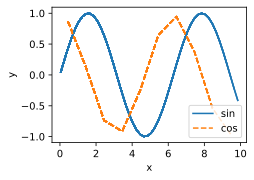

In [13]:
board = ProgressBoard('x', 'y')
for x in np.arange(0, 10, 0.1):
  board.draw(x, np.sin(x), 'sin', every_n=2)
  board.draw(x, np.cos(x), 'cos', every_n=10)

In [21]:
# Declaring namedtuple()
Student = collections.namedtuple('Student', ['name', 'age', 'DOB'])
 
# Adding values
S = Student('Davood', '29', '10-10-1993')
 
# Access using index
print("The Student age using index is : ", end="")
print(S[1])
 
# Access using name
print("The Student name using keyname is : ", end="")
print(S.name)

The Student age using index is : 29
The Student name using keyname is : Davood
